In [56]:
import pandas as pd


## Load Dataset

In [76]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Explore

In [58]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Explore - temp, humidity

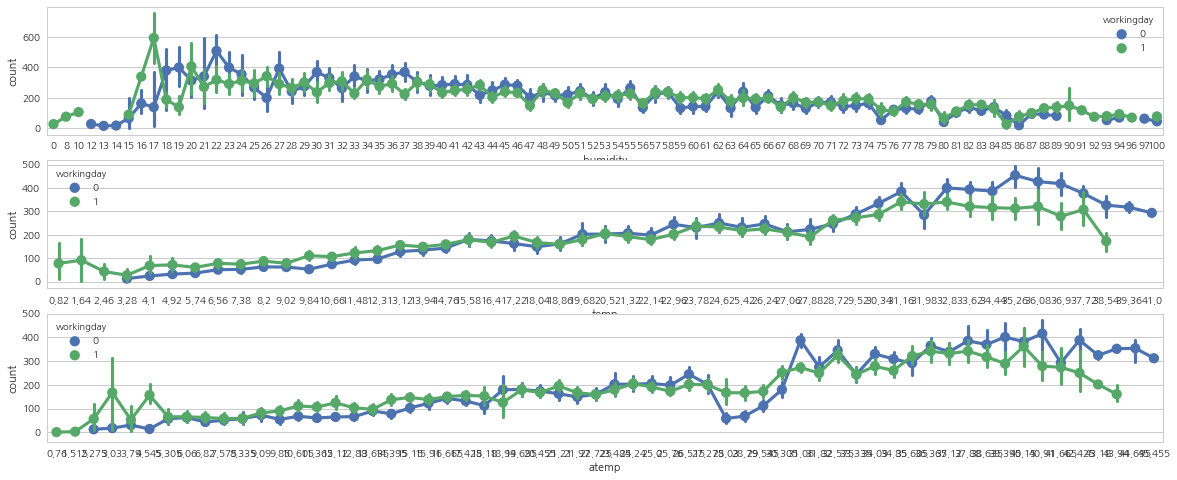

In [79]:
figure, (ax1, ax2,ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(20, 8)

sns.pointplot(data=train, x="humidity", y="count",hue="workingday",ax=ax1)
sns.pointplot(data=train, x="temp", y="count",hue="workingday", ax=ax2)
sns.pointplot(data=train, x="atemp", y="count",hue="workingday", ax=ax3)

#sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

(2302, 19)


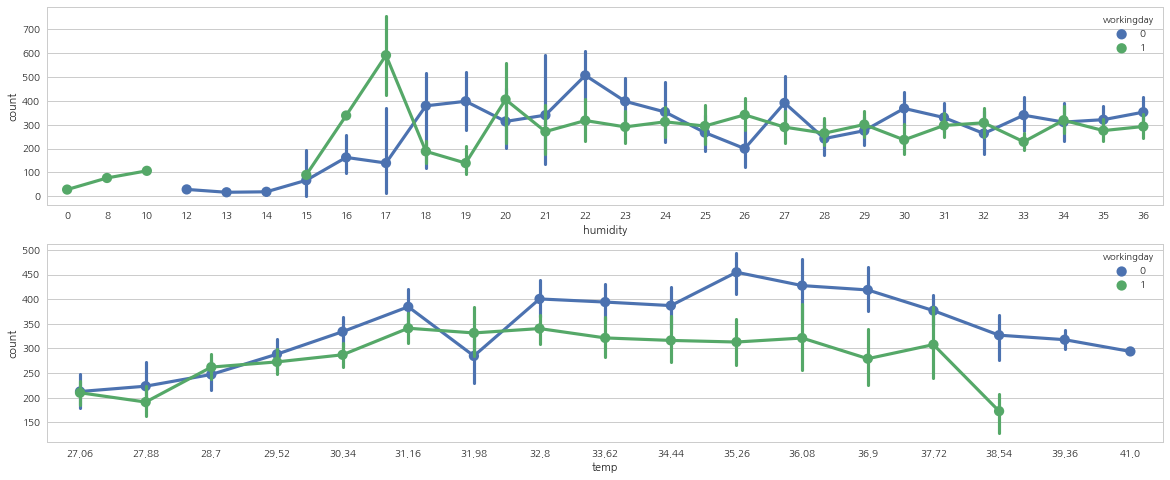

In [60]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(20, 8)

low_humi=train[train["humidity"]<37]
high_temp=train[train["temp"]>27]

               
print(high_humi.shape)
high_humi.head()

#sns.lmplot(data=high_humi,x="humidity",y="count", hue="workingday")

sns.pointplot(data=low_humi, x="humidity", y="count",hue="workingday",ax=ax1)
sns.pointplot(data=high_temp, x="temp", y="count",hue="workingday", ax=ax2)

 $Lesson Learned
   * 대체로 휴무에 상관없이 트렌드가 있다
        - 쌀쌀할때 - 근무날 더 많이 탄다
        - 더울 때 - 쉬는날 더 탄다        
   * humidity는 (극단으로 갈수록) 높을수록 안 탄다.- 반비례
   * temp는  (추울수록) 높을수록 많이 타지만 일하는 날은 안 탄다.-비례


### Try - temp/humid

In [61]:
train["temp+humid/humid"]=(train["temp"]+train["humidity"])/(train["humidity"] + 1)
train[["temp+humid/humid","temp","humidity"]].head()

,temp+humid/humid,temp,humidity
0,1.107805,9.84,81
1,1.099012,9.02,80
2,1.099012,9.02,80
3,1.116316,9.84,75
4,1.116316,9.84,75


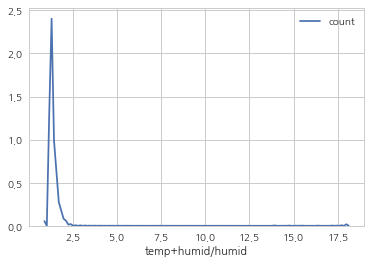

In [62]:
figure.set_size_inches(16, 6)

sns.distplot(train["temp+humid/humid"],hist=False,label="count")

 $Lesson Learned
   * 시사점 : 온도, 습도의 트렌드가 명확해짐


### Explore datetime

In [63]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 19)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


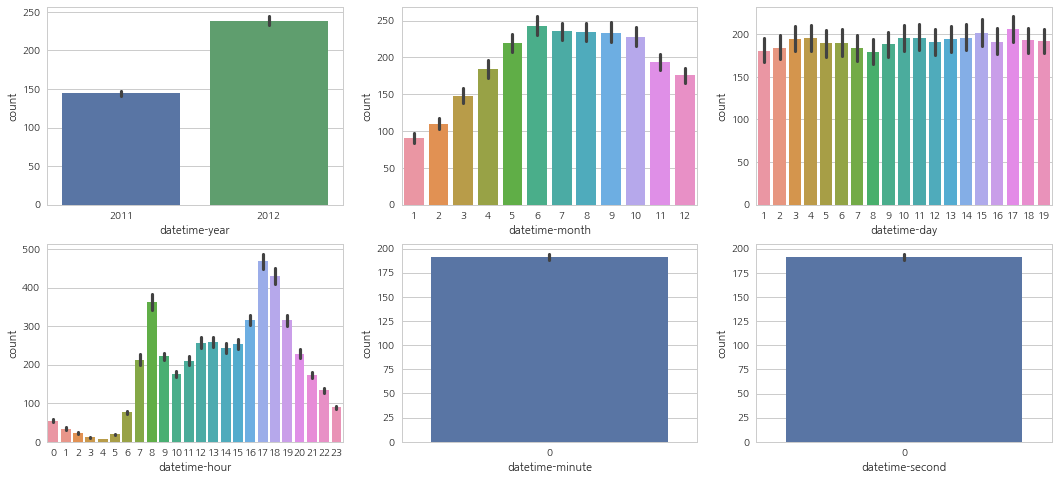

In [64]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

** Lesson Learned **
  * **datetime-minute**와 **datetime-second**는 현재 기록되고 있지 않다. 그러므로 사용할 필요가 없다.
  * train.csv와 test.csv는 **datetime-day**를 기준으로 나뉘어져 있다. 그러므로 **datetime-day**를 feature로 사용해서는 안 된다.
  * 매년 서비스 증가추세이기 때문에 월별 추이만 걸러내는 것은 문제있다.

### Concatenate year and month

In [65]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


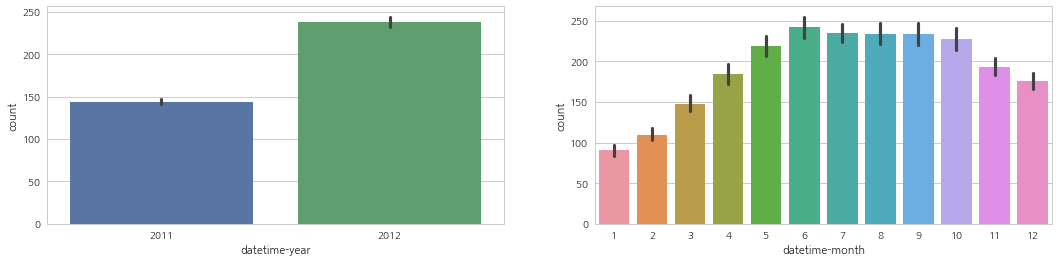

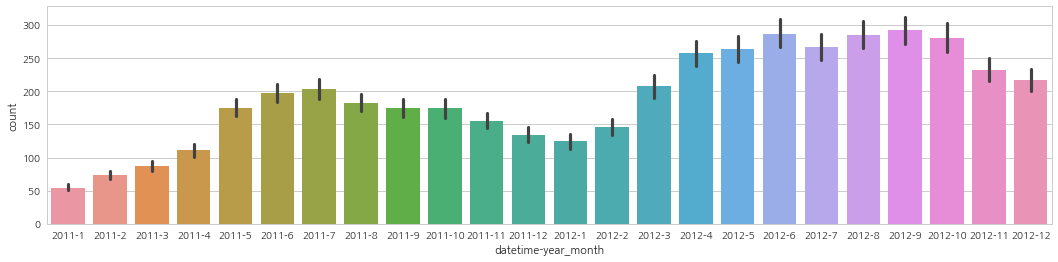

In [66]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)


figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

** Lesson Learned **
  * 2011년 12월과 2012년 1월의 자전거 대여량을 비슷하지만, 두 개를 따로 놓고 보면 이를 알 수 없다.
  * 2011년에는 8월부터 대여량이 감소하고, 2012년에는 7월부터 대여량이 감소한다. 마찬가지로 따로 놓고 보면 이를 알 수 없다.

### Explore - weather&season

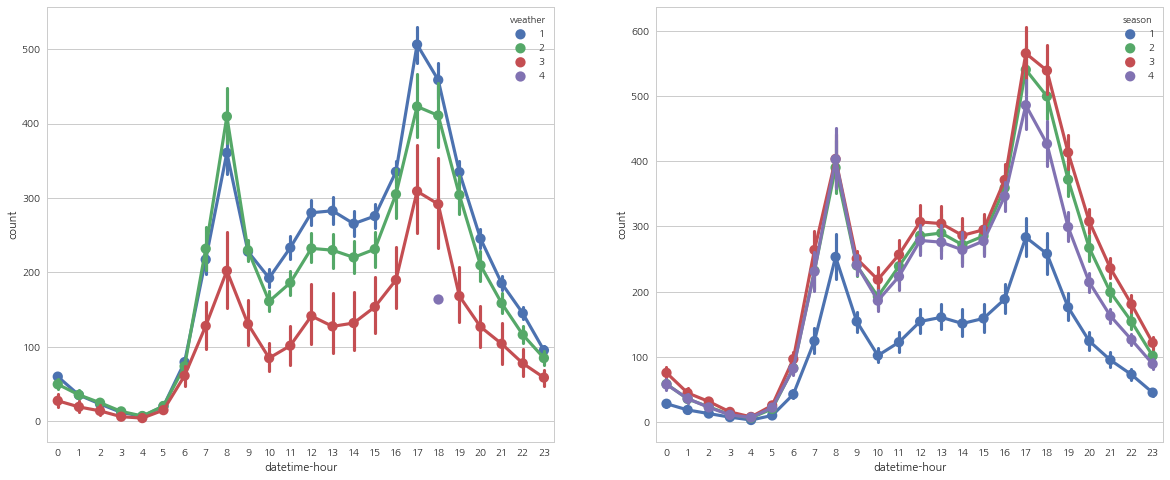

In [67]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(20, 8)

sns.pointplot(data=train, x="datetime-hour", y="count",hue="weather",ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count",hue="season",ax=ax2)

 ** Lesson Learned **
    * 4분기, 악천후는 두드러지게 사용량이 적다
    * 날씨가 좋은 순으로 많이 사용한다 

### Explore hour - workingday

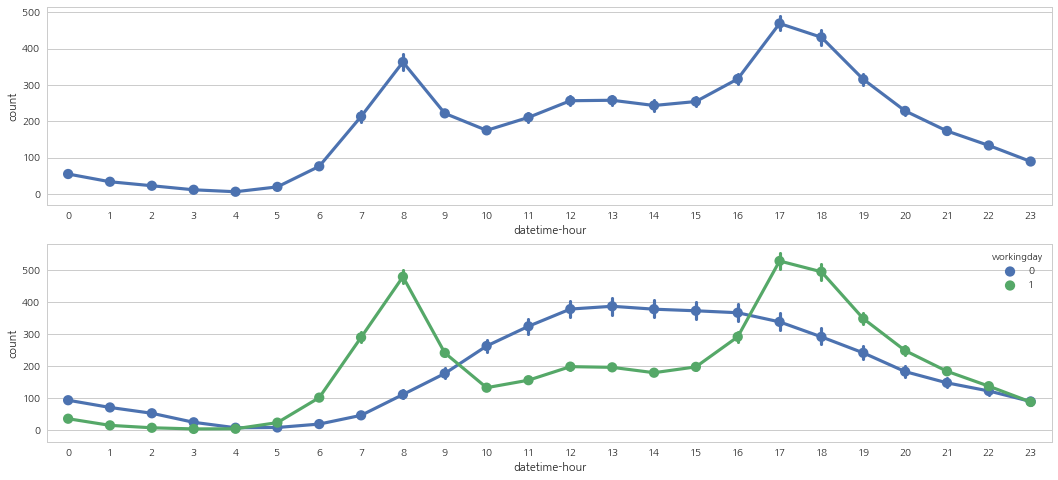

In [68]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

** Lesson Learned **
  * 주중(workingday==1)에는 출근 시간과 퇴근 시간에 자전거를 많이 대여한다.
  * 주말(workingday==0)에는 오후 시간에 자전거를 많이 대여한다.
  * 주중(월,화,수,목,금)이 주말(토,일)보다 많기 때문에, 두 개를 나눠서 보지 않으면 주말의 특성을 파악할 수 없다.

### Explore hour - dayofweek

In [69]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 21)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


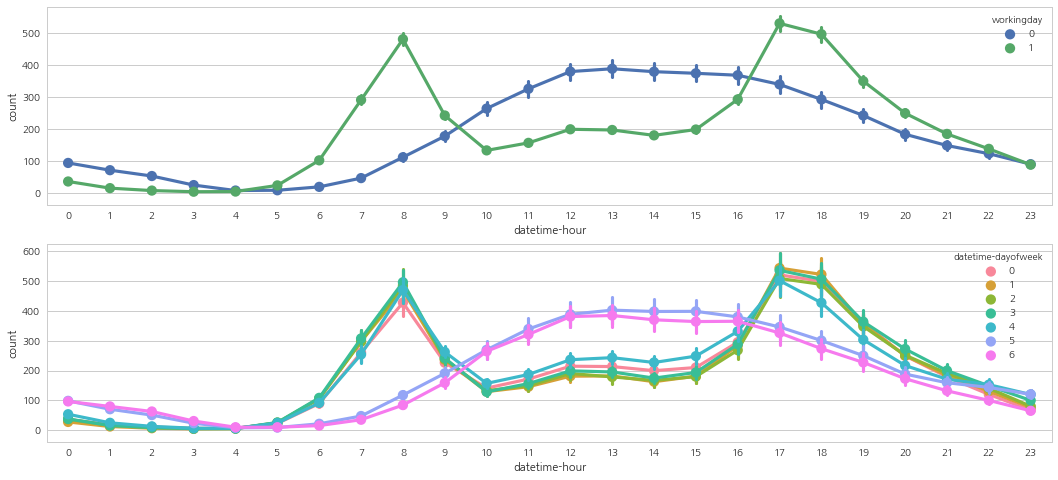

In [70]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

** Lesson Learned **
  * 금요일(dayofweek==4)는 주중이지만, 아주 약간 주말의 특성을 반영하고 있다.
  * 비슷하게 월요일(dayofweek==0)도 아주 약간 주말의 특성을 반영하고 있다.
  * 사람들이 휴가를 월요일과 금요일에 사용하기 때문이라고 추측할 수 있다.

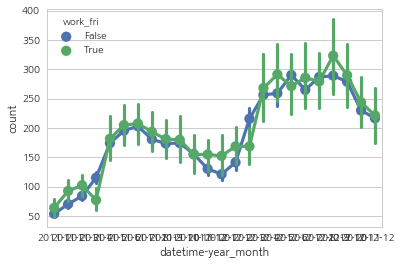

In [71]:
figure.set_size_inches(20, 4)
train["work_fri"]= (train["datetime-dayofweek"]==4) & (train["workingday"]==1)

sns.pointplot(data=train, x="datetime-year_month", y="count", hue="work_fri")

### Explore - holiday & working day 

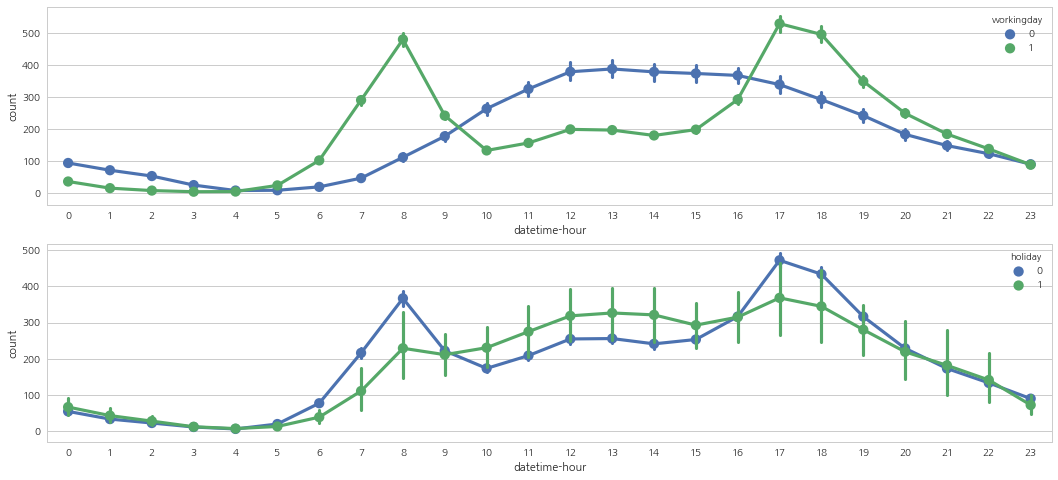

In [72]:
#perish=low_fare[low_fare["Survived"]==0]
#survived=low_fare[low_fare["Survived"]==1]

#sns.barplot(train["workingday"],hist=False,label="Perish")
#sns.barplot(train["workingday"],hist=False,label="Survived")

figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="holiday", ax=ax2)

 ### Try - holiday & working day

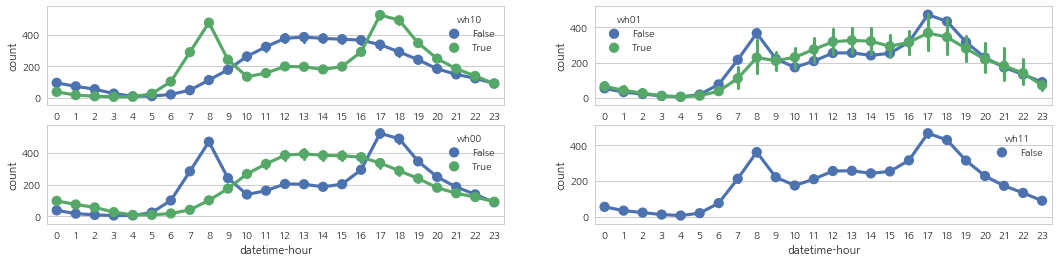

In [73]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 4)

train["wh10"]= (train["workingday"]==1) & (train["holiday"]==0)#중복
train["wh01"]= (train["workingday"]==0) & (train["holiday"]==1)
train["wh00"]= (train["workingday"]==0) & (train["holiday"]==0)#중복
train["wh11"]= (train["workingday"]==1) & (train["holiday"]==1)#존재하지 않음

sns.pointplot(data=train, x="datetime-hour", y="count", hue="wh10",ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="wh01",ax=ax2)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="wh00",ax=ax3)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="wh11",ax=ax4)

 ** Lesson Learned **
   - 휴일에 쉬는 사람, 
     * working == 1 , holiday == 0 일할 때 일한다
     * working == 0 , holiday == 0 일할 때 쉰다   
     * working == 1 , holiday == 1 쉴 때 일한다: 꽤 많다!
     * working == 0 , holiday == 1 쉴 때 쉰다

### Explore casual / register

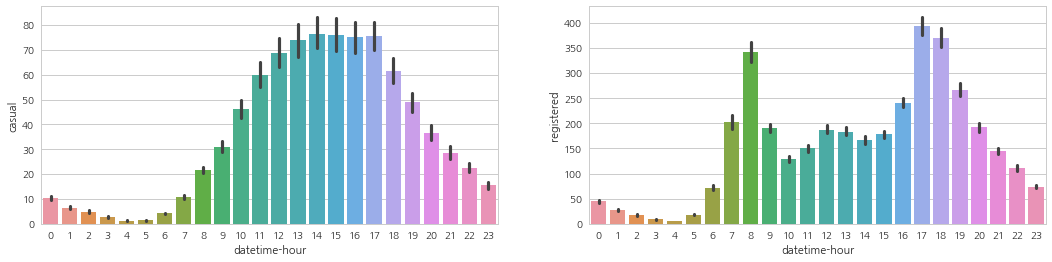

In [74]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train,x="datetime-hour", y="casual",ax=ax1)
#sns.lmplot(data=train,x="datetime-hour", y="count")

sns.barplot(data=train,x="datetime-hour", y="registered",ax=ax2)
#hue="datetime-year_month"  casual 	registered

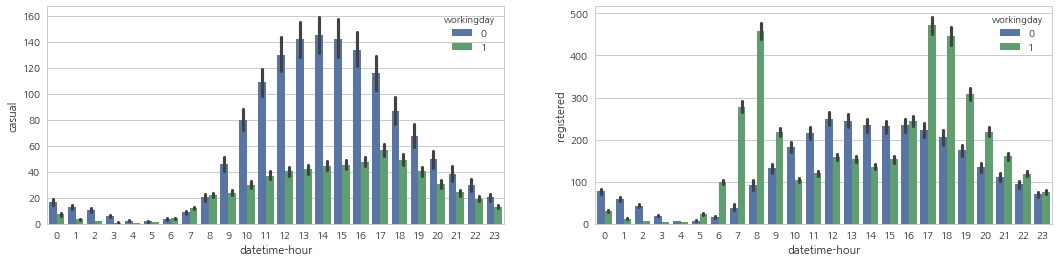

In [75]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train,x="datetime-hour", y="casual",hue="workingday", ax=ax1)
sns.barplot(data=train,x="datetime-hour", y="registered",hue="workingday", ax=ax2)

 Lesson Learned

  * 회원/비회원의 사용패턴이 눈에 띄게 다르다.
    - 회원: 휴무일에는 점심에, 근무일에는 출퇴근에
    - 비회원: 휴무일 늦은 아침, 근무일 이른 저녁 - 쉬는날 매우 큼.
